<b>impors

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
from datetime import datetime
from pprint import pprint

<h2>Урок 7. Открытые данные</h2>
<ol>
<li>Создать приложение, которое будет из готового файла с данными «Сбербанка» (https://www.sberbank.com/ru/analytics/opendata) выводить результат по параметрам:
    <ul>
        <li>Тип данных
        <li>Интервал дат
        <li>Область
    </ul>
<li>Визуализировать выводимые данные с помощью графика
<ul>

<b>consts

In [2]:
DATASET = 'opendata.csv'
ENCODING = 'cp1251'
%matplotlib inline
rcParams['figure.figsize'] = 15, 9

<b>Begin

In [3]:
data = pd.read_csv(DATASET, encoding=ENCODING, index_col=False)
data.head(5)

,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508
2,Количество заявок на потребительские кредиты,Россия,2013-03-15,628803
3,Количество заявок на потребительские кредиты,Россия,2013-04-15,836054
4,Количество заявок на потребительские кредиты,Россия,2013-05-15,867235


In [4]:
print("Доступные регионы")
data['region'].unique()

Доступные регионы


array(['Россия', 'Алтайский край', 'Амурская область',
       'Архангельская область', 'Астраханская область',
       'Белгородская область', 'Брянская область', 'Владимирская область',
       'Волгоградская область', 'Вологодская область',
       'Воронежская область', 'Еврейская автономная область',
       'Забайкальский край', 'Ивановская область', 'Иркутская область',
       'Кабардино-Балкарская Республика', 'Калининградская область',
       'Калужская область', 'Камчатский край', 'Кемеровская область',
       'Кировская область', 'Костромская область', 'Краснодарский край',
       'Красноярский край', 'Курганская область', 'Курская область',
       'Ленинградская область', 'Липецкая область', 'Магаданская область',
       'Москва', 'Московская область', 'Мурманская область',
       'Ненецкий автономный округ', 'Нижегородская область',
       'Новгородская область', 'Новосибирская область', 'Омская область',
       'Оренбургская область', 'Орловская область', 'Пензенская область',

In [5]:
print("Доступные Датасеты")
data['name'].unique()

Доступные Датасеты


array(['Количество заявок на потребительские кредиты',
       'Средняя сумма заявки на потребительский кредит',
       'Количество заявок на ипотечные кредиты',
       'Средняя сумма заявки на ипотечный кредит',
       'Количество новых депозитов', 'Средняя сумма нового депозита',
       'Средняя зарплата', 'Средняя пенсия',
       'В среднем руб. на текущем счете на человека',
       'В среднем депозитов в руб. на человека',
       'Средние расходы по картам', 'Средний чек в формате Фастфуд',
       'Средний чек в формате Ресторан',
       'Средние траты в ресторане фастфуд', 'Средние траты в ресторане'],
      dtype=object)

In [6]:
print(f'Даты доступны между {data["date"].min()} - {data["date"].max()}')

Даты доступны между 2013-01-15 - 2019-01-15


In [10]:
NAME = 'Количество заявок на ипотечные кредиты'
REGIONS = ['Республика Татарстан', 'Сахалинская область', 'Тверская область']
S_DATE = '2013-01-15'
E_DATE = '2019-01-15'

In [13]:
d = data.loc[(data['name'] == NAME) & data['date'].between(S_DATE, E_DATE)]
regions_data = []
for region in REGIONS:
    regions_data.append({'name': region,
                         'data': d.loc[d['region'] == region]
                        })

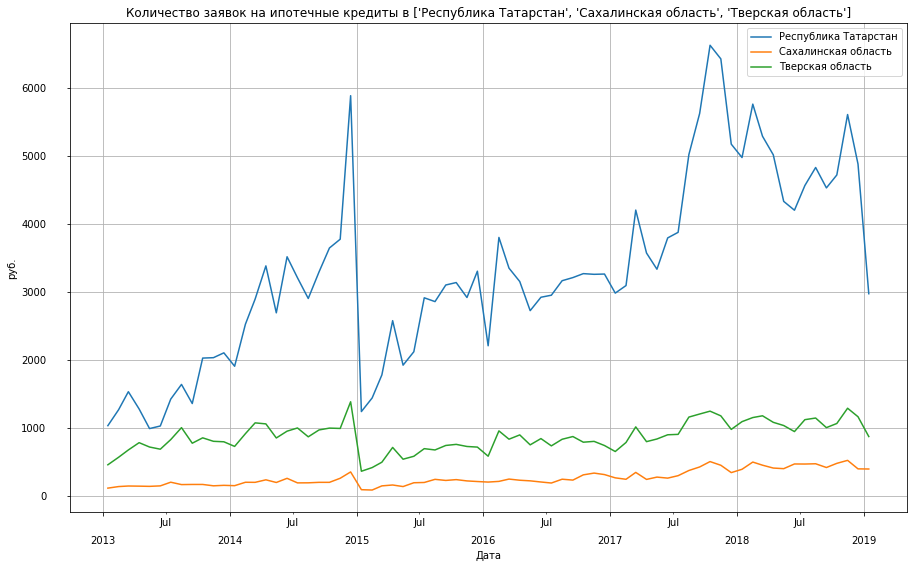

In [19]:
dates = np.array(d['date'])
X = np.array(X)

ax = plt.gca()
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator([1, 7]))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
ax.tick_params(pad=20)
plt.xlabel('Дата', labelpad=5)
plt.ylabel('руб.')
plt.title(f'{NAME} в {REGION}')
for data in regions_data:
    Y = data['data']['value']
    X = []
    for date in data['data']['date']:
        X.append(matplotlib.dates.date2num(datetime.strptime(date, '%Y-%m-%d')))
    plt.plot(X, Y, label=data['name'])
plt.grid()
plt.legend()